In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Create a DataFrame with the Example data
data = {     
    'Size' : [1,2,3,4,5,6,7,8,9,10],     
    'Price' : [3,6,11,18,27,38,51,66,83,102] 
}
df = pd.DataFrame(data)
df.head()

,Size,Price
0,1,3
1,2,6
2,3,11
3,4,18
4,5,27


In [3]:
# Size of the house (X) and Price (Y)
X = df[['Size']]
Y = df['Price']

In [4]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

<h2><b>With Standardize Values</b></h2>

In [5]:
# Define the pipeline with two steps: Polynomial feature transformation and Ridge regression
model = Pipeline([
    
    # Step 1: Apply PolynomialFeatures to generate polynomial and interaction features
    ('polynomialModel', PolynomialFeatures(degree=5)),
    
    # Step 2: Apply Ridge regression to regularize and fit the model
    ('ElasticNetModel', ElasticNet(alpha=1.0, l1_ratio=0.5))
])

In [6]:
# fit it to the training data
model.fit(X_train, Y_train)

d:\ArtifialMeachanine\py10venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.213e+00, tolerance: 7.503e-01
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polynomialModel', PolynomialFeatures(degree=5)),
                ('ElasticNetModel', ElasticNet())])

In [7]:
# Make predictions on the test data and Comparing the Data
y_pred = model.predict(X_test)
compareValues = pd.DataFrame({'ActualValue' : Y_test, 'PredictedValue' : y_pred})
compareValues

,ActualValue,PredictedValue
8,83,83.309383
1,6,6.262836
5,38,37.743432


In [8]:
# Evaluate the model
print(f"MSE : {mean_squared_error(Y_test, y_pred)}")
print(f"Round Sq : {r2_score(Y_test, y_pred)}")

MSE : 0.07687576907026646
Round Sq : 0.9999229358519011


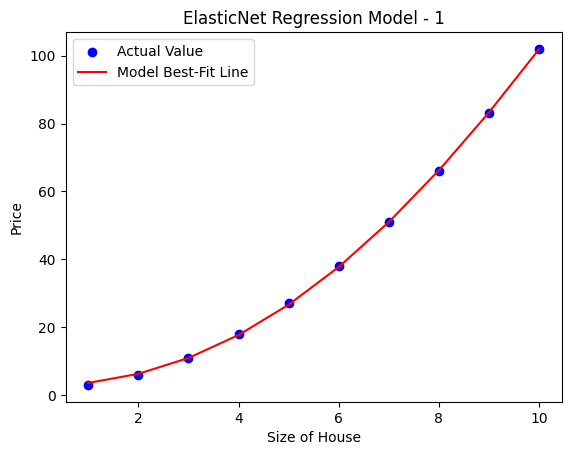

In [9]:
# Plotting the results
plt.scatter(X, Y, color='blue', label='Actual Value')
plt.plot(X, model.predict(X), color='red', label='Model Best-Fit Line')
plt.title('ElasticNet Regression Model - 1')
plt.xlabel('Size of House')
plt.ylabel('Price')
plt.legend()
plt.show()

<h2><b>WithOut Standardize Values</b></h2>

In [10]:
# fit it to the training data

model2 = ElasticNet(alpha=1, l1_ratio=0.5)
model2.fit(X_train, Y_train)

ElasticNet(alpha=1)

In [11]:
# Make predictions on the test data and Comparing the Data

Y_pred = model2.predict(X_test)
comapretable = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred})
comapretable

,Actual,Predicted
8,83,76.782964
1,6,4.128355
5,38,45.645274


In [12]:
# Evaluate the model
print(f"MSE : {mean_squared_error(Y_test, Y_pred)}")
print(f"Round Sq : {r2_score(Y_test, Y_pred)}")

MSE : 33.53493752913179
Round Sq : 0.9663828873065063


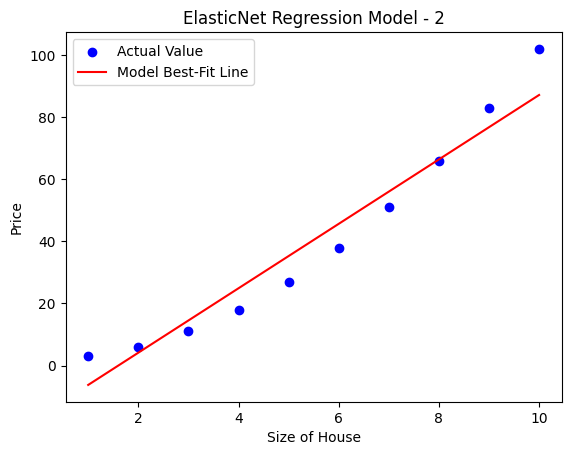

In [13]:
# Plotting the results
plt.scatter(X, Y, color='blue', label='Actual Value')
plt.plot(X, model2.predict(X), color='red', label='Model Best-Fit Line')
plt.title('ElasticNet Regression Model - 2')
plt.xlabel('Size of House')
plt.ylabel('Price')
plt.legend()
plt.show()